<a href="https://colab.research.google.com/github/Agil0509/Deep-Learning/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Model

In [2]:
def VGG16():

  input_ = Input(shape =(224,224,3))

  # first block (2 Convolution + 1 Max pool)
  conv1 = Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation = 'relu')(input_)
  conv2 = Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation = 'relu')(conv1)
  pool1 = MaxPooling2D(pool_size = (3,3),strides = (2,2))(conv2)

  # second block (2 Convolution + 1 Max pool)
  conv3 = Conv2D(filters = 128, kernel_size = (3,3),padding = 'same', activation = 'relu')(pool1)
  conv4 = Conv2D(filters = 128, kernel_size = (3,3),padding = 'same', activation = 'relu')(conv3)
  pool2 = MaxPooling2D(pool_size = (3,3),strides = (2,2))(conv4)

  # third block (3 Convolution + 1 Max pool)
  conv5 = Conv2D(filters = 256, kernel_size = (3,3),padding = 'same', activation = 'relu')(pool2)
  conv6 = Conv2D(filters = 256, kernel_size = (3,3),padding = 'same', activation = 'relu')(conv5)
  conv7 = Conv2D(filters = 256, kernel_size = (3,3),padding = 'same', activation = 'relu')(conv6)
  pool3 = MaxPooling2D(pool_size = (3,3),strides = (2,2))(conv7)

  # fourth block (3 Convolution + 1 Max pool)
  conv8 = Conv2D(filters = 512, kernel_size = (3,3),padding = 'same', activation = 'relu')(pool3)
  conv9 = Conv2D(filters = 512, kernel_size = (3,3),padding = 'same', activation = 'relu')(conv8)
  conv10 = Conv2D(filters = 512, kernel_size = (3,3),padding = 'same', activation = 'relu')(conv9)
  pool4 = MaxPooling2D(pool_size = (3,3),strides = (2,2))(conv10)

  # fifth block (3 Convolution + 1 Max pool)
  conv11 = Conv2D(filters = 512, kernel_size = (3,3),padding = 'same', activation = 'relu')(pool4)
  conv12 = Conv2D(filters = 512, kernel_size = (3,3),padding = 'same', activation = 'relu')(conv11)
  conv13 = Conv2D(filters = 512, kernel_size = (3,3),padding = 'same', activation = 'relu')(conv12)
  pool5 = MaxPooling2D(pool_size = (3,3),strides = (2,2))(conv13)

  # Flatten layer
  flat = Flatten()(pool5)

  # 2 Dense layers
  dense1 = Dense(units = 4096, activation = 'relu')(flat)
  dense2 = Dense(units = 4096, activation='relu')(dense1)

  # Output layer
  output = Dense(units = 1, activation = 'sigmoid')(dense2)

  model = Model(inputs = input_, outputs = output)

  return model

In [3]:
!kaggle datasets download -d ashishjangra27/gender-recognition-200k-images-celeba

Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/gender-recognition-200k-images-celeba
License(s): CC-BY-NC-SA-4.0
gender-recognition-200k-images-celeba.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip -q '/content/gender-recognition-200k-images-celeba.zip'

replace Dataset/Test/Female/160001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

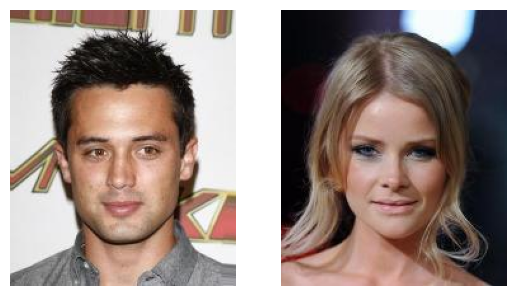

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.subplot(1,2,1)
img_male = mpimg.imread('/content/Dataset/Train/Male/000007.jpg')
plt.imshow(img_male)
plt.axis('off')

plt.subplot(1,2,2)
img_female = mpimg.imread('/content/Dataset/Train/Female/000010.jpg')
plt.imshow(img_female)
plt.axis('off')
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Image_shape = (224,224)
Batch_size = 32

train_dir = '/content/Dataset/Train'
test_dir = '/content/Dataset/Test'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = Image_shape,
                                               class_mode = 'binary',
                                               batch_size = Batch_size)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = Image_shape,
                                             class_mode = 'binary',
                                             batch_size = Batch_size)

Found 160000 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.


In [7]:
vgg16_model = VGG16()

vgg16_model.compile(loss = 'binary_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ['accuracy'])

In [ ]:
history = vgg16_model.fit(train_data, epochs = 3,
                          validation_data=test_data)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   1/5000 ━━━━━━━━━━━━━━━━━━━━ 114:03:20 82s/step - accuracy: 0.5312 - loss: 0.6930

#Transfer Learning

In [9]:
vgg16 = tf.keras.applications.VGG16(include_top = False)    # without output layer

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [10]:
for layer in vgg16.layers:
  layer.trainable = False

In [11]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_layer_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [13]:
vgg16_model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

vgg16_model2.compile(loss = 'binary_crossentropy',
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

vgg16_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │          25,089 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = vgg16_model2.fit(train_data,epochs=2,
                 validation_data = test_data)

Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   4/5000 ━━━━━━━━━━━━━━━━━━━━ 27:58:10 20s/step - accuracy: 0.4408 - loss: 1.0765